### ТЗ ПАО Совкомбанка

1. Даны две таблицы: A (client_id )  и B (client_id), причем A содержит B, необходимо вычислить количество 
клиентов (client_id), содержащихся только в А

##### - А) select count(*) from A where A.client_id not in (select client_id from B); [+]
- Б) select count(*) from A left join B on A.client_id =B.client_id;
- В) select count(*) from A left join B on A.client_id =B.client_id where B.client_id  is NULL;
- Г) select count(*) from A inner join B on A.client_id =B.client_id where A.client_id is NULL;

2.  Даны две таблицы: А(client_id,phone) и B(phone, time), необходимо для всякого клиента из А установить
время последнего звонка из В.
- ***А) select client_id, max(time) from A left join B on A.phone=B.phone  group by client_id; [+]***
- Б) select client_id, time from A left  join (select phone, max(time) as time from B group by phone) C on A.phone =C.phone;
- В) select client_id, time from A right  join (select phone, max(time) as time from B group by phone) C on A.phone =C.phone;
- Г) select * from (select client_id, time, rank() over (partition by client_id order by time) as n from A left join B on A.phone=B.phone) where n=1;

3. Как выбрать все записи из таблицы &quot;Persons&quot;, где значение поля &quot;FirstName&quot; начинается с буквы &quot;a&quot;?
- A) select * from Persons WHERE FirstName like &#39;%a&#39;;
- Б) select * from Persons WHERE FirstName=&#39;a&#39;;
- ***В) select * from Persons WHERE FirstName like &#39;a%&#39;; [+]***
- Г) select * from Persons WHERE FirstName=&#39;%a%&#39;;

4. Оператор OR срабатывает, когда … - истина, AND – когда … истина.
- ***A) хоть одно условие, все условия [+]***
- Б) все условия, хоть одно условие

5. Выберите правильный SQL запрос для вставки новой записи в таблицу &quot;Persons&quot;.
- ***А) insert into Persons values (&#39;Jimmy&#39;, &#39;Jackson&#39;); [+]***
- Б) insert values (&#39;Jimmy&#39;, &#39;Jackson&#39;) into Persons;
- В) insert (&#39;Jimmy&#39;, &#39;Jackson&#39;) into Persons;

6. Как изменить значение &quot;Hansen&quot; на &quot;Nilsen&quot; в колонке &quot;LastName&quot;, таблицы Persons?
- А) update Persons set LastName=&#39;Hansen&#39; into LastName=&#39;Nilsen&#39;
- Б) modify Persons set LastName=&#39;Nilsen&#39; where LastName=&#39;Hansen&#39;
- ***В) update Persons set LastName=&#39;Nilsen&#39; where LastName=&#39;Hansen&#39; [+]***
- Г) modify Persons set LastName=&#39;Hansen&#39; into LastName=&#39;Nilsen

7. Верные ли результаты вернет запрос select surname from employees where salary = null?

```
select surname from employees where salary IS null
```

8. Что происходит по команде commit?

Записываются изменения произведенные над таблицой

9. Напишите sql-запрос для вывода текущей даты. (oracle, ms sql - на выбор)

```
SELECT CURRENT_DATE;
```

10.1 Вывести из таблиц Credit_Info и Product_Info столбцы номер кредита, дата выдачи, товар и сумма
кредита.


```
SELECT Credit_Info.CREDITID, Credit_Info.ISSUEDATE, Product_Info.GOOD, Credit_Info.LOANAMOUNT,
FROM Credit_Info, Product_Info
WHERE Credit_Info.ID = Product_Info.ID
```

10.2 Вывести уникальные товары из таблицы Product_Info, продаваемые магазином ООО Неоторг (таблица
Customer_Info, колонка ShopName)


```
SELECT DISTINCT Product_Info.GOOD
FROM Product_Info, Customer_Info
WHERE Product_Info.CREDITID = Customer_Info.CREDITID AND Customer_Info.SHOPNAME = 'ООО Неоторг'
```

10.3 Вывести номера клиентов, суммарное количество кредитов которых превышает 2

```
SELECT CUSTOMERID
FROM Customer_Info
GROUP BY NAME || ' ' || SURNAME || ' ' || PATRONYMIC || ' ' || BIRTHDATE
HAVING COUNT(CUSTOMERID) > 2
```

10.4 Вывести информацию о скольких различных клиентах есть информация в таблице Credit_Info

```
SELECT COUNT(Customer_Info.NAME || ' ' || 
             Customer_Info.SURNAME || ' ' || 
             Customer_Info.PATRONYMIC || ' ' || 
             Customer_Info.BIRTHDATE as FULL_INFO)
FROM Customer_Info, Credit_Info
GROUP BY FULL_INFO
HAVING Customer_Info.CREDITID = Credit_Info.CREDITID
```

10.5 Подсчитать одним запросом количество кредитов в следующих интервалах:
- до 5,000
- 5,000 – 10,000
- 10,000 – 15,000
- 15,000 – 20,000
- и т.д.


```
SELECT CAST(FLOOR(LOANAMOUNT / 5000) * 5000 AS VARCHART) ||  '-'  ||
       CAST((FLOOR(LOANAMOUNT / 5000) + 1) * 5000 AS VARCHART)
       as INTERVAL, 
       COUNT(CREDITID)
FROM Credit_Info
GROUP BY INTERVAL
ORDER BY length(INTERVAL)
```

10.6. Вывести количество и сумму выданных кредитов кумулятивно за 2022 год по месяцам.
Использовать таблицу Credit_Info.

```
SELECT 
    strftime('%m', ISSUEDATE) AS MONTH, 
    COUNT(CREDITID) as CREDIT_COUNT, 
    SUM(LOANAMOUNT) as LOAN_SUM
FROM Credit_Info
WHERE strftime('%Y', ISSUEDATE) = '2022'
GROUP BY MONTH
```

### Задание 2

По ссылке [https://yadi.sk/d/DliqgCal3ZkR58](https://yadi.sk/d/DliqgCal3ZkR58) находится сэмпл данных по интернет-заявкам (лидам) на кредитную карту и конверсиях.

Поле issued содержит флаг выдачи карты, activated – флаг активации (совершения первой покупки по карте).

Поля CAMPAIGN_SOURCE, CAMPAIGN, CAMPAIGN_MEDIUM, CAMPAIGN_TERM, CAMPAIGN_CONTENT содержат информацию об источниках. Существует иерархия источников CAMPAIGN_MEDUM – CAMPAIGN_SOURCE – CAMPAIGN. Один CAMPAIGN может присутствовать внутри разных CAMPAIGN_MEDIUM.

Банк стремится минимизировать стоимость активированной карты, при этом действует следующая система расчетов с поставщиками:

- Agent, Affiliate, Network: 200 рублей за выданную (issued) карту,
- PKW: 27 рублей за интернет-заявку,
- Representative: 150 рублей за выданную карту,
- Display: 100000 рублей на всю кампанию (на все заявки, представленные в файле),
- прочие источники бесплатны.

Для всех каналов действует минимальный KPI по конверсии из лида в выдачу (issued) в размере 5%.

Задачи:

2.1.      Трафик-менеджер обратился к вам с просьбой определить качественные и некачественные источники трафика (**CAMPAIGN**) с точки зрения выполнения KPI по конверсии в выдачу и стоимости активированной карты.На выходе должен быть csv или Excel-файл с указанием N самых качественных и M самых некачественных источников (по CAMPAIGN по цене активированной карты). Все качественные источники должны вписываться в KPI по конверсии. N и M необходимо определить самостоятельно, соблюдая требования к значимости рассчитанных показателей.

2.2.      Веб-инженер обратился к вам с просьбой найти предикторы низкой активации карты среди данных, присутствующих в файле.На выходе нужен список факторов и описание модели.

Обе части являются обязательными.

Для решения задачи нужно использовать Python. Лучше всего оформить задание в виде jupyter notebook, но .py файл тоже принимается.

 

Срок выполнения 3 дня.

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "../ORIGINAL/ds_test.csv"

In [3]:
original_df = pd.read_csv(path, encoding='latin-1', delimiter='\t')

original_df

,ï.¿ID_CONTACT,CAMPAIGN_SOURCE,PARTNER,CAMPAIGN,CAMPAIGN_MEDIUM,CAMPAIGN_TERM,CAMPAIGN_CONTENT,CAMPAIGN_NUMBER,SEARCH_TERM,AGE,...,applied,issued,LOAN_AMOUNT,UNIQ,PROCESSED_WITH_DELIVERY,LANDING_NAME,ONLINE_DECISION,TO_BE_CONTACTED,ACTIVATED,ACTIVATION_DATE
0,186883978,leads,NaN,47949,Network,47949},721f8e0db0d333add8a4359794b0a0ab,NaN,NaN,26,...,NaN,NaN,0.0,1,0.0,NaN,"incomplete, score not requested, processed to CRM",1,NaN,NaN
1,188449084,cityads,https://rfhhd.com/click-BQIOUJYG-RMIQCEY7?bt=2...,5m1w,Network,29041-1-1524300223-9223025,NaN,NaN,NaN,26,...,NaN,NaN,0.0,1,0.0,NaN,"incomplete, score not requested, processed to CRM",1,NaN,NaN
2,186164434,leadgid,NaN,27471,Affiliate,NaN,NaN,NaN,NaN,23,...,NaN,NaN,0.0,1,0.0,NaN,"incomplete, score not requested, processed to CRM",1,NaN,NaN
3,182560077,admitad,NaN,717430,Affiliate,803419,ad43a3a1a6447715fc0c9f2ce7ed9f34,NaN,NaN,34,...,NaN,NaN,0.0,1,0.0,NaN,"incomplete, score not requested, processed to CRM",1,NaN,NaN
4,187369393,leads,NaN,47949,Network,47949},bac21b865a3e825169e5e433a9b9183c,NaN,NaN,25,...,NaN,NaN,0.0,1,0.0,NaN,"incomplete, score not requested, processed to CRM",1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174394,191724040,cpahub,NaN,sovcombankoffer,Agent,apihalva,1483,NaN,NaN,46,...,NaN,NaN,0.0,0,NaN,NaN,NaN,1,NaN,NaN
174395,189549919,cityads,https://umllb.com/click-CQKCST01-RMIQCEY7?bt=2...,oY490X,Network,29041-1-1524572373-5200819,NaN,NaN,NaN,31,...,NaN,NaN,0.0,1,0.0,NaN,"incomplete, score not requested, processed to CRM",1,NaN,NaN
174396,188754843,PFS,NaN,bestwebmaster,Representative,180,9272480205,NaN,NaN,52,...,NaN,NaN,0.0,1,NaN,NaN,NaN,1,NaN,NaN
174397,181216004,mastertarget,NaN,crediton,Agent,NaN,NaN,NaN,NaN,21,...,NaN,NaN,0.0,1,NaN,NaN,NaN,1,NaN,NaN


In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174399 entries, 0 to 174398
Data columns (total 52 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ï.¿ID_CONTACT            174399 non-null  int64  
 1   CAMPAIGN_SOURCE          174377 non-null  object 
 2   PARTNER                  73661 non-null   object 
 3   CAMPAIGN                 171890 non-null  object 
 4   CAMPAIGN_MEDIUM          174399 non-null  object 
 5   CAMPAIGN_TERM            93864 non-null   object 
 6   CAMPAIGN_CONTENT         72683 non-null   object 
 7   CAMPAIGN_NUMBER          0 non-null       float64
 8   SEARCH_TERM              0 non-null       float64
 9   AGE                      174399 non-null  int64  
 10  SEX                      0 non-null       float64
 11  IS_MARRIED               0 non-null       float64
 12  IS_RETIRED               0 non-null       float64
 13  IS_RESIDENT              0 non-null       float64
 14  IS_2

Сделаем небольшую подготовку датасета:

    - уберем нетипичные символы из названий столбцов
    - выбросим столбцы не содержащие ничего кроме nan

In [5]:
df = original_df.dropna(axis=1, how='all')
print("dropped nan columns:")
set(original_df.columns) - set(df.columns)

dropped nan columns:


{'ABTEST_CONFIGURATION',
 'ASSIST_OPERATOR',
 'AUX_ID_2',
 'CAMPAIGN_NUMBER',
 'IS_20_YEARS_EXPERIENSE',
 'IS_MARRIED',
 'IS_RESIDENT',
 'IS_RETIRED',
 'LANDING_NAME',
 'MARITAL_STATUS',
 'SEARCH_TERM',
 'SEX',
 'SOCIAL_STATUS',
 'WORK_EXPERIENSE',
 'marketing_id'}

In [6]:
df = df.rename(columns={"ï.¿ID_CONTACT": "ID_CONTACT"})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174399 entries, 0 to 174398
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID_CONTACT               174399 non-null  int64  
 1   CAMPAIGN_SOURCE          174377 non-null  object 
 2   PARTNER                  73661 non-null   object 
 3   CAMPAIGN                 171890 non-null  object 
 4   CAMPAIGN_MEDIUM          174399 non-null  object 
 5   CAMPAIGN_TERM            93864 non-null   object 
 6   CAMPAIGN_CONTENT         72683 non-null   object 
 7   AGE                      174399 non-null  int64  
 8   DT_APPLICATION_START     174399 non-null  object 
 9   LEAD_DATE                174399 non-null  object 
 10  LEAD_WEEK                174399 non-null  int64  
 11  LEAD_MONTH               174399 non-null  int64  
 12  CREDIT_LIMIT             174399 non-null  int64  
 13  CREDIT_DURATION          174399 non-null  int64  
 14  ASSI

### Задача 2.1

Трафик-менеджер обратился к вам с просьбой определить качественные и некачественные источники трафика (**CAMPAIGN**) с точки зрения выполнения KPI по конверсии в выдачу и стоимости активированной карты. На выходе должен быть csv или Excel-файл с указанием N самых качественных и M самых некачественных источников (по CAMPAIGN по цене активированной карты). Все качественные источники должны вписываться в KPI по конверсии. N и M необходимо определить самостоятельно, соблюдая требования к значимости рассчитанных показателей.


### Решение


###### Идея
Заметим, что банк интересуют не просто выданные, но активированные карты: *Банк стремится минимизировать стоимость активированной карты*, *...(по CAMPAIGN по цене активированной карты)*. С другой стороны, банк обязан платить поставщикам за выданную карту или заявку.

На первом уровне мы можем разделить источники на группы по признаку наличия в группе активных карт. На следующем уровне можно произвести деление на подгруппы по порогу KPI. Наконец, можно сделать разделение на подгруппы по принципу, платил банк данному источнику или нет. При такой иерархии признаков, мы получим 8 подгрупп, на которых уже задано отношение порядка:


```
- 1: есть активированные карты | Высокий KPI | бесплатный источник
- 2: есть активированные карты | Высокий KPI | платный источник

- 3: есть активированные карты | Низкий KPI  | бесплатный источник
- 4: есть активированные карты | Низкий KPI  | платный источник

- 5: нет активированных карт   | Высокий KPI | бесплатный источник
- 6: нет активированных карт   | Высокий KPI | платный источник

- 7: нет активированных карт   | Низкий KPI  | бесплатный источник
- 8: нет активированных карт   | Низкий KPI  | платный источник
```

Таким образом, мы получили самую лучшую (1) и самую худшую (8) по качеству группы источников. Внутри каждой подгруппы источники можно отсортировать по средней стоимости активированной карты - чем она ниже, тем лучше источник

###### Описание процесса

Поскольку нас интересуют наименования ```CAMPAIGN```, предварительно очистим датасет от строк, в которых данное поле неизвестно.

In [20]:
new_df = df[df.CAMPAIGN.notna()]
new_df = df[df.CAMPAIGN != "none"]

new_df 

,ID_CONTACT,CAMPAIGN_SOURCE,PARTNER,CAMPAIGN,CAMPAIGN_MEDIUM,CAMPAIGN_TERM,CAMPAIGN_CONTENT,AGE,DT_APPLICATION_START,LEAD_DATE,...,APP_IN_OFFICE_WEEK,applied,issued,LOAN_AMOUNT,UNIQ,PROCESSED_WITH_DELIVERY,ONLINE_DECISION,TO_BE_CONTACTED,ACTIVATED,ACTIVATION_DATE
0,186883978,leads,NaN,47949,Network,47949},721f8e0db0d333add8a4359794b0a0ab,26,2018-04-17 19:15:01,2018-04-17,...,NaN,NaN,NaN,0.0,1,0.0,"incomplete, score not requested, processed to CRM",1,NaN,NaN
1,188449084,cityads,https://rfhhd.com/click-BQIOUJYG-RMIQCEY7?bt=2...,5m1w,Network,29041-1-1524300223-9223025,NaN,26,2018-04-21 12:45:00,2018-04-21,...,NaN,NaN,NaN,0.0,1,0.0,"incomplete, score not requested, processed to CRM",1,NaN,NaN
2,186164434,leadgid,NaN,27471,Affiliate,NaN,NaN,23,2018-04-16 12:40:01,2018-04-16,...,NaN,NaN,NaN,0.0,1,0.0,"incomplete, score not requested, processed to CRM",1,NaN,NaN
3,182560077,admitad,NaN,717430,Affiliate,803419,ad43a3a1a6447715fc0c9f2ce7ed9f34,34,2018-04-05 18:05:00,2018-04-05,...,NaN,NaN,NaN,0.0,1,0.0,"incomplete, score not requested, processed to CRM",1,NaN,NaN
4,187369393,leads,NaN,47949,Network,47949},bac21b865a3e825169e5e433a9b9183c,25,2018-04-18 20:10:01,2018-04-18,...,NaN,NaN,NaN,0.0,1,0.0,"incomplete, score not requested, processed to CRM",1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174394,191724040,cpahub,NaN,sovcombankoffer,Agent,apihalva,1483,46,2018-04-30 14:50:23,2018-04-30,...,NaN,NaN,NaN,0.0,0,NaN,NaN,1,NaN,NaN
174395,189549919,cityads,https://umllb.com/click-CQKCST01-RMIQCEY7?bt=2...,oY490X,Network,29041-1-1524572373-5200819,NaN,31,2018-04-24 16:20:00,2018-04-24,...,NaN,NaN,NaN,0.0,1,0.0,"incomplete, score not requested, processed to CRM",1,NaN,NaN
174396,188754843,PFS,NaN,bestwebmaster,Representative,180,9272480205,52,2018-04-22 14:08:37,2018-04-22,...,NaN,NaN,NaN,0.0,1,NaN,NaN,1,NaN,NaN
174397,181216004,mastertarget,NaN,crediton,Agent,NaN,NaN,21,2018-04-02 07:32:23,2018-04-02,...,NaN,NaN,NaN,0.0,1,NaN,NaN,1,NaN,NaN


Составим фрейм, сгрупированный по уникальным значениям ```CAMPAIGN```. Поскольку один ```CAMPAIGN``` может содержать несколько ```CAMPAIGN_MEDIUM```, от которых зависит стоимость карты, то сначала внутри каждого ```CAMPAIGN``` будем также разделять данные по ```CAMPAIGN_MEDIUM```. Добавим необходимые столбцы для вычисления суммарной стоимости: 
- количество выпущеных карт
- кол-во активированных карт
- кол-во позиций, которые должны быть оплачены (в зависимости от тарифа)
- цена за позицию
- суммарная стоимость


In [8]:
tarifs = {'Network': 200,  # issued
          'Affiliate': 200, # issued
          'Agent': 200, # issued
          'Representative': 150, # issued
          'PKW': 27, # интернет-заявка
          'Display': 100_000} # (на все заявки, представленные в файле)


def compute_positions(df):
    
    df["positions"] = 0
    df.loc[df.CAMPAIGN_MEDIUM == 'Display', "positions"] = 1

    ind_1 = df.CAMPAIGN_MEDIUM.isin(['Network', 'Affiliate', 'Agent', 'Representative'])   
    df.loc[ind_1, "positions"] = df[ind_1].issued
    
    ind_2 = df.CAMPAIGN_MEDIUM == 'PKW'
    df.loc[ind_2, "positions"] = df[ind_2].ID_CONTACT_count

    return df
    
    
def compute_campaign_df(_df, conversion_condition="issued", threshold=5):

    df = _df.groupby(["CAMPAIGN", 
                      "CAMPAIGN_MEDIUM"]).agg({'ID_CONTACT': 'count', 
                                               'issued':'sum', 
                                               'ACTIVATED':'sum'
                                              }).sort_values("ID_CONTACT", ascending=False).reset_index()
        
    df.rename(columns={"ID_CONTACT": "ID_CONTACT_count"}, inplace=True)
    df = compute_positions(df)
    df["price"] = df.CAMPAIGN_MEDIUM.map(tarifs).fillna(0)   
    df["total_sum"] = df.price * df.positions
       
    for column in df.select_dtypes(include="float").columns:
        df[column] = df[column].astype("int")
    
    return df

In [21]:
campaign_df = compute_campaign_df(new_df)

campaign_df

,CAMPAIGN,CAMPAIGN_MEDIUM,ID_CONTACT_count,issued,ACTIVATED,positions,price,total_sum
0,5m1w,Network,16807,984,405,984,200,196800
1,27471,Affiliate,12407,655,229,655,200,131000
2,24497,Affiliate,10877,549,201,549,200,109800
3,22797,Affiliate,9811,487,174,487,200,97400
4,52218,Network,9028,575,244,575,200,115000
...,...,...,...,...,...,...,...,...
1473,2415237,Representative,1,0,0,0,150,0
1474,2415213,Representative,1,0,0,0,150,0
1475,2415161,Representative,1,0,0,0,150,0
1476,2415089,Representative,1,1,1,1,150,150


Далее, сгруппируем все данные внутри каждого уникального ```CAMPAIGN```. Добавим признаки, описанные в идее решения. Заодно, для каждого ```CAMPAIGN``` соберем все ```CAMPAIGN_MEDIUM```, что потенциально может представлять интерес для трафик-менеджера.

In [22]:
def compute_final_campaign_df(df, conversion_condition="activated", threshold=5):
    
    columns = list(df.columns)
    columns.remove("CAMPAIGN_MEDIUM")
    columns.remove("CAMPAIGN")
    
    dct = {i: sum for i in columns}
    dct["CAMPAIGN_MEDIUM"] = list
    
    df = df.groupby("CAMPAIGN").agg(dct).drop(columns=["price", 
                                                       "positions"]).sort_values("ID_CONTACT_count", 
                                                                             ascending=False)
    
    df["mediums_count"] = df.CAMPAIGN_MEDIUM.apply(len)
    
    
    # average price
    df["ANY_ACTIVATED"] = df.ACTIVATED.apply(lambda x: x > 0)

    df["average_price"] = df.total_sum / df.ACTIVATED    
    ind = df.ANY_ACTIVATED == False
    df.loc[ind, "average_price"] = df[ind].total_sum
    
    df["FREE_CAMPAIGN"] = df.average_price.apply(lambda x: x == 0)
    
    
    # KPI
    df["conversion_percent"] = df[conversion_condition] / df['ID_CONTACT_count'] * 100
    df["KPI_is_done"] = df["conversion_percent"].apply(lambda x: x >= threshold)
    assert df.isna().any().sum() == 0
    
    return df

In [23]:
final_campaign_df = compute_final_campaign_df(campaign_df, conversion_condition="issued", threshold=5)

final_campaign_df

,ID_CONTACT_count,issued,ACTIVATED,total_sum,CAMPAIGN_MEDIUM,mediums_count,ANY_ACTIVATED,average_price,FREE_CAMPAIGN,conversion_percent,KPI_is_done
CAMPAIGN,,,,,,,,,,,
5m1w,16807,984,405,196800,[Network],1,True,485.925926,False,5.854703,True
27471,12407,655,229,131000,[Affiliate],1,True,572.052402,False,5.279278,True
24497,10877,549,201,109800,[Affiliate],1,True,546.268657,False,5.047348,True
22797,9811,487,174,97400,[Affiliate],1,True,559.770115,False,4.963816,False
52218,9028,575,244,115000,[Network],1,True,471.311475,False,6.369074,True
...,...,...,...,...,...,...,...,...,...,...,...
2415089,1,1,1,150,[Representative],1,True,150.000000,False,100.000000,True
2415083,1,0,0,0,[Representative],1,False,0.000000,True,0.000000,False
2415013,1,0,0,0,[Representative],1,False,0.000000,True,0.000000,False


Наконец, посмотрим сколько источников содержится в каждой из 8-ми подгрупп и сохраним файл с лучшими и худшими подгруппами

In [24]:
def separate_groups(df, path="result.csv"):
    
    info_df = df.groupby(["ANY_ACTIVATED",
                          "KPI_is_done",
                          "FREE_CAMPAIGN"]).count().sort_index(ascending=False)[["ID_CONTACT_count"]]
        
    best_df = df[(df.ANY_ACTIVATED == True) &
                 (df.KPI_is_done == True) &
                 (df.FREE_CAMPAIGN == True)].sort_values("average_price", ascending=True)
    
    worst_df = df[(df.ANY_ACTIVATED == False) &
                  (df.KPI_is_done == False) &
                  (df.FREE_CAMPAIGN == False)].sort_values("average_price", ascending=False)
    

    file = pd.concat([best_df, worst_df], axis=0)
    best_id = best_df.index
    file["QUALITY"] = "WORST"
    file.loc[best_id, "QUALITY"] = "BEST"
    columns = list(file.columns)     
    columns = [columns[-1]] + columns[:-1]
    file = file[columns]
    file.reset_index().to_csv(path)
    
    print(info_df)
    print()
    print(f"number of the best CAMPAIGNs | N = {best_df.shape[0]}")
    print(f"number of the worst CAMPAIGNs | M = {worst_df.shape[0]}")
    print()
    print(f"saved: {path}")
    
    return file

In [25]:
result = separate_groups(final_campaign_df)

result

                                         ID_CONTACT_count
ANY_ACTIVATED KPI_is_done FREE_CAMPAIGN                  
True          True        True                          8
                          False                       117
              False       True                          5
                          False                        69
False         True        True                          1
                          False                        56
              False       True                       1179
                          False                        19

number of the best CAMPAIGNs | N = 8
number of the worst CAMPAIGNs | M = 19

saved: result.csv


,QUALITY,ID_CONTACT_count,issued,ACTIVATED,total_sum,CAMPAIGN_MEDIUM,mediums_count,ANY_ACTIVATED,average_price,FREE_CAMPAIGN,conversion_percent,KPI_is_done
CAMPAIGN,,,,,,,,,,,,
halvaproductpage,BEST,1273,72,55,0,[referral],1,True,0.0,True,5.655931,True
invitefriend,BEST,796,82,61,0,[Mobile],1,True,0.0,True,10.301508,True
direct,BEST,492,30,17,0,[Direct],1,True,0.0,True,6.097561,True
nedostavilipilot,BEST,208,15,9,0,[Callcenter],1,True,0.0,True,7.211538,True
halvapage,BEST,38,3,2,0,[Partner],1,True,0.0,True,7.894737,True
finalizepilot,BEST,7,1,1,0,[Callcenter],1,True,0.0,True,14.285714,True
12mesyacev,BEST,5,1,1,0,"[Print, Affiliate]",2,True,0.0,True,20.000000,True
YT_ti_halva_25_34,BEST,3,1,1,0,[OLV],1,True,0.0,True,33.333333,True
tmail,WORST,129,1,0,3483,[PKW],1,False,3483.0,False,0.775194,False


Отметим пункты, на которые можно было бы обратить внимание при более детальном анализе:

1. подгруппы ```CAMPAIGN```, в которых нет активированных карт:

поправка на длительность - можно предположить что некоторые источники трафика работают недостаточно долго, и в ближайшем будущем появятся клиенты, которые покроют затраты на данные источники.

2. ```CAMPAIGN = None```:

можно было бы попытаться восстановить значения из соседних полей (таких как ```PARTNER``` ), либо просто аггрегировать информацию по ```CAMPAIGN_MEDIUM```, чтобы извлечь хоть какую-то информацию об источниках, которые нам неизвестны.

3. Rating:

Использование в качестве ранжирующей метрики взвешенной суммы средней цены за активированную карту и кол-во активированных карт, поскольку количество клиентов влияет на доход банка. Кроме того, можно было бы рассмотреть процент активированных карт (от кол-ва выпущенных), чтобы оценить эффективность источника.

### Задача 2.2.

Веб-инженер обратился к вам с просьбой найти предикторы низкой активации карты среди данных, присутствующих в файле.На выходе нужен список факторов и описание модели.

###### Идея решения

Для определения факторов, которые оказывают наибольшее влияние на низкую активацию карты сделаем следующее:
- натренируем модель на задачу бинарной классификации (карта активирована или нет) на имеющихся данных
- для натренированной модели воспользуемся стандартными методами интерпретации и оценки значимости признаков

В качестве классификатора будем использовать модель [catboost](https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier), так как в данных довольно много категориальных признаков + модель имеет встроенные методы интерпретации признаков. 


Используем несколько методов оценки важности признаков и сравним результаты. Описание методов:
- [ShapleyValues](https://catboost.ai/en/docs/concepts/shap-values)
- [LossFunctionChange](https://catboost.ai/en/docs/concepts/fstr#regular-feature-importances__lossfunctionchange)
- [InternalFeatureImportance](https://catboost.ai/en/docs/concepts/fstr#internal-feature-importance)

Кроме того, используем метод перестановок, не зависящий от модели:
- [permutations](https://christophm.github.io/interpretable-ml-book/feature-importance.html#feature-importance)

##### 1. Data Preprocessing

In [197]:
import matplotlib.pyplot as plt
from tqdm import tqdm as _tqdm
from itertools import combinations

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from catboost import CatBoostClassifier
from catboost import Pool
import shap

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174399 entries, 0 to 174398
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID_CONTACT               174399 non-null  int64  
 1   CAMPAIGN_SOURCE          174377 non-null  object 
 2   PARTNER                  73661 non-null   object 
 3   CAMPAIGN                 171890 non-null  object 
 4   CAMPAIGN_MEDIUM          174399 non-null  object 
 5   CAMPAIGN_TERM            93864 non-null   object 
 6   CAMPAIGN_CONTENT         72683 non-null   object 
 7   AGE                      174399 non-null  int64  
 8   DT_APPLICATION_START     174399 non-null  object 
 9   LEAD_DATE                174399 non-null  object 
 10  LEAD_WEEK                174399 non-null  int64  
 11  LEAD_MONTH               174399 non-null  int64  
 12  CREDIT_LIMIT             174399 non-null  int64  
 13  CREDIT_DURATION          174399 non-null  int64  
 14  ASSI

In [217]:
df.nunique() 

ID_CONTACT                 174399
CAMPAIGN_SOURCE               176
PARTNER                      9570
CAMPAIGN                     1455
CAMPAIGN_MEDIUM                17
CAMPAIGN_TERM               40428
CAMPAIGN_CONTENT            39200
AGE                            77
DT_APPLICATION_START        61457
LEAD_DATE                      30
LEAD_WEEK                       5
LEAD_MONTH                      1
CREDIT_LIMIT                  321
CREDIT_DURATION               241
ASSIST_METHOD                   4
AUX_ID_1                       46
AUX_ID_3                      100
COOKIE                      72090
LANDING_ID                     22
PARTNER_EXTERNAL_ID        168428
URL                         72645
DT_CONTACT                     30
ID_POTENTIAL_CUSTOMER      170789
contacted                       2
customer                    23776
APPLICATION_DT                 59
APP_IN_OFFICE_DATE             59
APP_IN_OFFICE_WEEK              9
applied                         1
issued        

Подготовим данные для классификатора:

- 1. отделим ACTIVATION 
- 2. выбросим ACTIVATION_DATE, так как по наличию или отсутствию nan в данной графе можно восстановить ACTIVATION
- 3. переведем столбцы с датами в соответствующий тип. Далее можем сгенерировать следующие признаки: вычислить разницу между каждой парой дат, что может являться важным признаком. Сами же даты разобъем на год, месяц, число.
- 4. переведем столбцы, содержащие бинарные значения в категориальный тип 
- 5. уберем некоторые столбцы, связанные с ID или содержащие много необработанного текста

In [367]:
DROP_COLUMNS = ["ID_CONTACT", "ID_POTENTIAL_CUSTOMER", "PARTNER_EXTERNAL_ID", 
                "customer",  "COOKIE", "URL"] ### ???


DATE_COLUMNS = ["DT_APPLICATION_START", "LEAD_DATE", "DT_CONTACT", "APPLICATION_DT", "APP_IN_OFFICE_DATE"]


def select_columns(df, select_columns):
    return df[select_columns]


def drop_columns(df, drop_columns):
    return df.drop(columns=drop_columns)


def drop_useless(df):
    return df[df.columns[df.nunique() > 1]]
    
    
def num2cat(df):
    for column in df.select_dtypes(include=np.number).columns:
        if df[column].nunique() == 2 and column != "ACTIVATED":
            df[column] = df[column].fillna('nan')
            df[column] = df[column].astype("category")
            df[column] = df[column].apply(str)
    return df


def obj2cat(df):
    for column in df.select_dtypes(include="object").columns:
        df[column] = df[column].fillna('nan')
        df[column] = df[column].astype("category")
        df[column] = df[column].apply(str)
    return df


def str2date(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column])
    return df


def timedelta(df, columns):
    pairs = combinations(columns, 2)
    for (col1, col2) in pairs:
        df[f"DIFF_{col1}_{col2}"] = np.abs(df[col1] - df[col2]) ### ???
    return df

        
def date2str(df):
    for column in df.select_dtypes(include="datetime").columns:
        df[f"{column}_YEAR"] = df[column].apply(lambda x: x.year)
        df[f"{column}_MONTH"] = df[column].apply(lambda x: x.month)
        df[f"{column}_DAY"] = df[column].apply(lambda x: x.day)
    return df


def preprocess_date(df, columns):
    df = str2date(df, columns)
    df = timedelta(df, columns)
    df = date2str(df)
    return df


def count_class_size(df):
    positive = df[df.ACTIVATED == 1]
    negative = df[df.ACTIVATED == 0]
    print(f"Positive: {positive.shape[0]}")
    print(f"Negative: {negative.shape[0]}")
    print()
    

def get_activation_df(df):   
    
    # 1. drop na
    _df = df[df.ACTIVATED.notna()]
    
    # 2. drop columns
    _df = drop_columns(_df, DROP_COLUMNS)
    
    # 3. datetime 
    _df = preprocess_date(_df, DATE_COLUMNS)
    
    # 4. useless
    _df = drop_useless(_df)
    
    # 5. numeric to category
    _df = num2cat(_df)
    
    # 6. object to category
    _df = obj2cat(_df)
    
    # 7. info
    count_class_size(_df)
    
    return _df.drop(columns=["ACTIVATION_DATE"]).reset_index(drop=True)

In [368]:
activation_df = get_activation_df(df)

activation_df.info()

Positive: 3647
Negative: 4820

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   CAMPAIGN_SOURCE                               8467 non-null   category       
 1   PARTNER                                       8467 non-null   category       
 2   CAMPAIGN                                      8467 non-null   category       
 3   CAMPAIGN_MEDIUM                               8467 non-null   category       
 4   CAMPAIGN_TERM                                 8467 non-null   category       
 5   CAMPAIGN_CONTENT                              8467 non-null   category       
 6   AGE                                           8467 non-null   int64          
 7   DT_APPLICATION_START                          8467 non-null   datetime64[ns] 
 8   LEAD_DATE                  

In [369]:
activation_df

,CAMPAIGN_SOURCE,PARTNER,CAMPAIGN,CAMPAIGN_MEDIUM,CAMPAIGN_TERM,CAMPAIGN_CONTENT,AGE,DT_APPLICATION_START,LEAD_DATE,LEAD_WEEK,...,DIFF_LEAD_DATE_APP_IN_OFFICE_DATE,DIFF_DT_CONTACT_APPLICATION_DT,DIFF_DT_CONTACT_APP_IN_OFFICE_DATE,DT_APPLICATION_START_DAY,LEAD_DATE_DAY,DT_CONTACT_DAY,APPLICATION_DT_MONTH,APPLICATION_DT_DAY,APP_IN_OFFICE_DATE_MONTH,APP_IN_OFFICE_DATE_DAY
0,leadgid,nan,24497,Affiliate,nan,nan,39,2018-04-25 21:50:00,2018-04-25,17,...,3 days,3 days,3 days,25,25,25,4,28,4,28
1,leads,nan,52791,Network,52791},00bfc636ddb90cb5c6c5c28886d770ea,35,2018-04-19 14:25:00,2018-04-19,16,...,2 days,2 days,2 days,19,19,19,4,21,4,21
2,leads,nan,50817,Affiliate,50817,3d659da64a800ad817b2b5d6ab60609b,40,2018-04-05 15:00:00,2018-04-05,14,...,8 days,8 days,8 days,5,5,5,4,13,4,13
3,smarter,nan,halvaoffer,Callcenter,nan,nan,32,2018-04-24 11:00:23,2018-04-24,17,...,0 days,0 days,0 days,24,24,24,4,24,4,24
4,cityads,https://umllb.com/click-HQICWXOH-RMIQCEY7?bt=2...,55JZ,Network,29041-1-1523435360-4206157,nan,47,2018-04-11 12:30:01,2018-04-11,15,...,7 days,7 days,7 days,11,11,11,4,18,4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8462,cityads,https://rfhhd.com/click-BQIOUJYG-RMIQCEY7?bt=2...,5m1w,Network,29041-1-1523017409-9224864,nan,38,2018-04-06 16:25:00,2018-04-06,14,...,3 days,3 days,3 days,6,6,6,4,9,4,9
8463,cityads,https://rfhhd.com/click-BQIOUJYG-RMIQCEY7?bt=2...,5m1w,Network,29041-1-1522856352-9202334,nan,27,2018-04-04 19:40:00,2018-04-04,14,...,2 days,2 days,2 days,4,4,4,4,6,4,6
8464,saleads,nan,881c0350-f5c6-11e7-99d4-7725e26f678f,Affiliate,9269a2c0-4b42-11e8-96a7-5756f7230fea,(not set),47,2018-04-29 03:17:04,2018-04-29,18,...,8 days,8 days,8 days,29,29,29,5,7,5,7
8465,mobilecredit,nan,nan,Mobile,nan,nan,118,2018-04-23 15:44:26,2018-04-23,17,...,0 days,0 days,0 days,23,23,23,4,23,4,23


In [370]:
def fill_na(df, cat_value="nan", num_value=None):
    
    cat_columns = df.select_dtypes('category').columns
    num_columns = df.select_dtypes(include=np.number).columns
    
    dct = dict()
    if cat_value:
        for col in cat_columns:
            dct[col] = cat_value
    if num_value:
        for col in num_columns:
            dct[col] = num_value
    
    return df.fillna(dct)
    
    
def separate_X_y(df, column="ACTIVATED"):
    y = df[column]
    X = df.drop(columns=[column])
    return X, y


def get_categorical_indices(df):
    return df.columns.get_indexer(df.select_dtypes('category').columns)


def split_data(X, y):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
    
    for train_index, test_index in sss.split(X, y):
        
#         print(train_index)
#         print(len(train_index))
        
#         print(test_index)
#         print(len(test_index))
        
        X_train, X_test = X[X.index.isin(train_index)], X[X.index.isin(test_index)]
        y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]
        
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]
        
#         print(y_train)
#         print(len(y_train))
    
        print(f"TOTAL size: {len(train_index) + len(test_index)}")
        print(f"TRAIN size: {len(train_index)} | TRAIN positive ratio: {sum(y_train)/len(y_train)}")
        print(f"TEST size:  {len(test_index)} | TEST positive ratio:  {sum(y_test)/len(y_test)}")

    return X_train, X_test, y_train, y_test


def prepare_data(df, select_columns=[], to_numpy=False):
    
    # 1. Select columns
    if select_columns:
        df = select_columns(df, select_columns)
    
#     # 2. fill na
#     df = fill_na(df)
    
    # 2. Separate X, y
    X, y = separate_X_y(df)
    
    # 3. Categorical indices
    ind = get_categorical_indices(X)
       
    
    # 4. .to_numpy()
    if to_numpy:
        X = X.to_numpy()
        y = y.to_numpy()
    
    # 6. Train / test
    X_train, X_test, y_train, y_test = split_data(X, y)

    return ind, X_train, X_test, y_train, y_test

In [371]:
ind, X_train, X_test, y_train, y_test = prepare_data(activation_df)

TOTAL size: 8467
TRAIN size: 6350 | TRAIN positive ratio: 0.43070866141732284
TEST size:  2117 | TEST positive ratio:  0.4307982994803968


##### 2. Catboost training pipeline

In [372]:
def log_loss(m, X, y): 
    return metrics.log_loss(y, m.predict_proba(X)[:,1]) ### cat features ???


def classification_results(y_test, y_pred):
    print(f"ROC_AUC: {roc_auc_score(y_test, y_pred)}")
    print()
    print(classification_report(y_test, y_pred))
    
    
def _get_trained_model(X_train, y_train, 
                       categorical_features_indices, 
                       iterations=500):
    
    model = CatBoostClassifier(one_hot_max_size=10, iterations=iterations)
    model.fit(
        X_train, y_train,
        cat_features = categorical_features_indices,
        verbose = False
    )
    return model


def get_trained_model(X_train, y_train, 
                      X_test, y_test,
                      categorical_features_indices, 
                      iterations=500):
    
    model = _get_trained_model(X_train, y_train, categorical_features_indices, iterations=iterations)
    y_pred = model.predict(X_test)
    classification_results(y_test, y_pred)
    return model, y_pred


def iterations_grid_search(X_train, y_train, 
                           X_test, y_test, 
                           categorical_features_indices):
    
    iteration = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 900, 1000]
    loss = []
    
    for i in _tqdm(iteration, desc="iterations"):
        model = _get_trained_model(X_train, y_train, categorical_features_indices, iterations=i)
        test_loss = log_loss(model, X_test, y_test)
        train_loss = log_loss(model, X_train, y_train)
        loss.append((i, test_loss, train_loss))
        
    return loss
        
        
def plot_loss(loss):
    plt.plot([i[0] for i in loss], [i[1] for i in loss]) 
    plt.plot([i[0] for i in loss], [i[2] for i in loss]) 
    plt.show()
    
    
def choose_iteration(X_train, y_train, 
                     X_test, y_test, 
                     categorical_features_indices):
    
    loss = iterations_grid_search(X_train, y_train, 
                                  X_test, y_test, 
                                  categorical_features_indices)
    plot_loss(loss)

iterations: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [01:53<00:00,  6.29s/it]


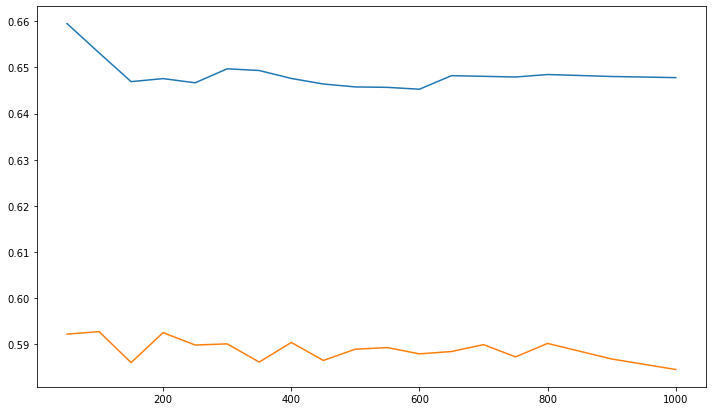

In [373]:
choose_iteration(X_train, y_train, X_test, y_test, ind)

In [377]:
MODEL, Y_PRED = get_trained_model(X_train, y_train, 
                                  X_test, y_test, 
                                  ind, iterations=1000)


ROC_AUC: 0.5976855390551066

              precision    recall  f1-score   support

         0.0       0.63      0.90      0.74      1205
         1.0       0.69      0.29      0.41       912

    accuracy                           0.64      2117
   macro avg       0.66      0.60      0.58      2117
weighted avg       0.66      0.64      0.60      2117



##### 3. INTERPRETATION METHODS

In [384]:
def get_feature_score(model, X_test, y_test, categorical_features_indices, method="ShapValues"):
    
    return model.get_feature_importance(Pool(X_test, 
                                             label=y_test,
                                             cat_features=categorical_features_indices), 
                                        type=method)


def create_feature_score_df(X_test, fi):
    
    feature_score = pd.DataFrame(list(zip(X_test.dtypes.index, fi)),
                                 columns=['Feature','Score'])

    feature_score = feature_score.sort_values(by='Score', 
                                              ascending=False, 
                                              inplace=False, 
                                              kind='quicksort', 
                                              na_position='last')
    return feature_score


def feature_score_bar_plot(feature_score, method):    
    plt.rcParams["figure.figsize"] = (12, 7)
    ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
    ax.set_title(f"Feature Importance using {method}", fontsize = 14)
    ax.set_xlabel("features")
    plt.show()

    
def feature_score_pipeline(X_test, fi, method):
    feature_score = create_feature_score_df(X_test, fi)
    feature_score_bar_plot(feature_score, method)



def shap_score(model, X_test, y_test, categorical_features_indices):
    
    shap_values = get_feature_score(model, 
                                     X_test, 
                                     y_test, 
                                     categorical_features_indices, 
                                     method="ShapValues")
    
    shap_values = shap_values[:,:-1]
    shap.summary_plot(shap_values, X_test)

                      
def permutation_score(model, X, y, metric=log_loss):
    
    baseline = metric(model, X, y)
    imp = []
    
    for col in X.columns:
        save = X[col].copy()
        X[col] = np.random.permutation(X[col])
        
        m = metric(model, X, y)
        X[col] = save
        imp.append(m - baseline)
        
    return np.array(imp)


def get_feature_imp_plot(model, 
                         X_train, y_train, 
                         X_test, y_test, 
                         categorical_features_indices, 
                         method="ShapeValues", 
                         metric=log_loss):

    standard_methods = ["PredictionValuesChange", "LossFunctionChange"]
    
    if method in standard_methods:
        fi = get_feature_score(model, 
                               X_test, 
                               y_test, 
                               categorical_features_indices, 
                               method=method)
    
    elif method == "ShapeValues":
        fi = shap_score(model, 
                        X_test, y_test, 
                        categorical_features_indices)
        
    elif method == "Permutation":
        fi = permutation_score(model, X_test, y_test, metric=metric)

    else:
        raise ValueError("Unknown interpretation method")
        
        
    if fi is not None:    
        feature_score_pipeline(X_test, fi, method)
        

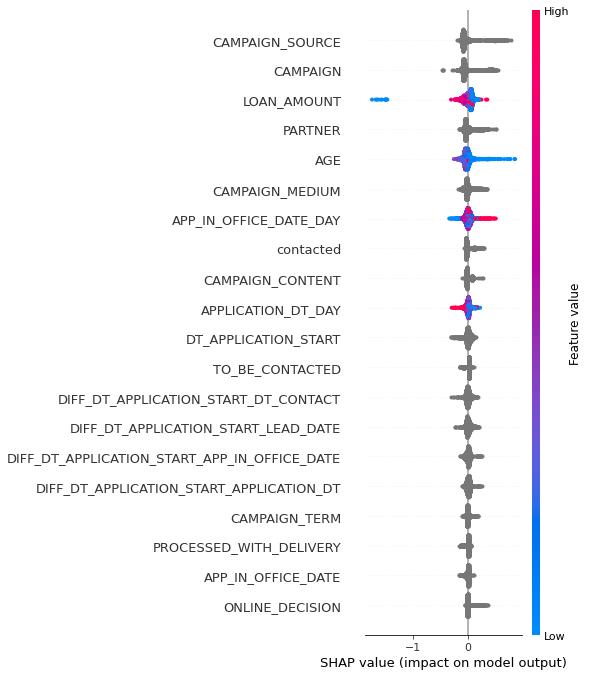

In [383]:
get_feature_imp_plot(MODEL, 
                     X_train, y_train, 
                     X_test, y_test, 
                     ind, 
                     method="ShapeValues", 
                     metric=log_loss)

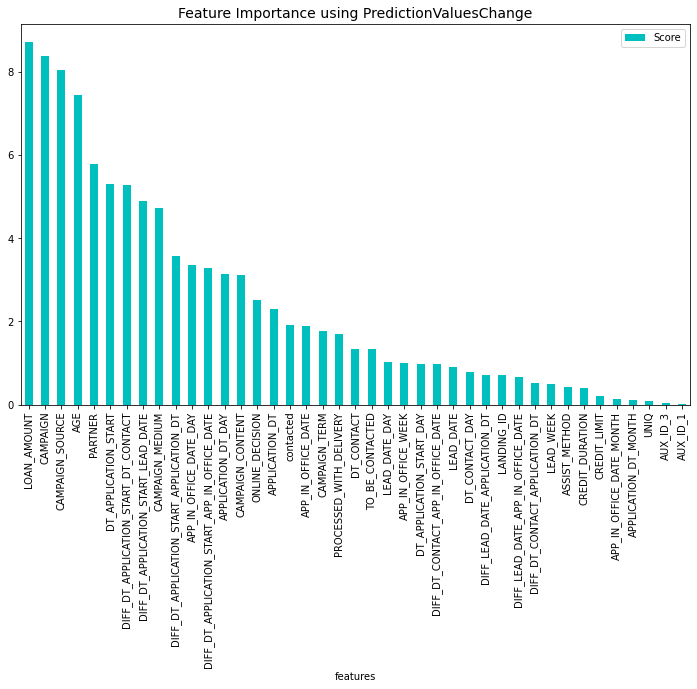

In [379]:
get_feature_imp_plot(MODEL, 
                     X_train, y_train, 
                     X_test, y_test, 
                     ind, 
                     method="PredictionValuesChange", 
                     metric=log_loss)

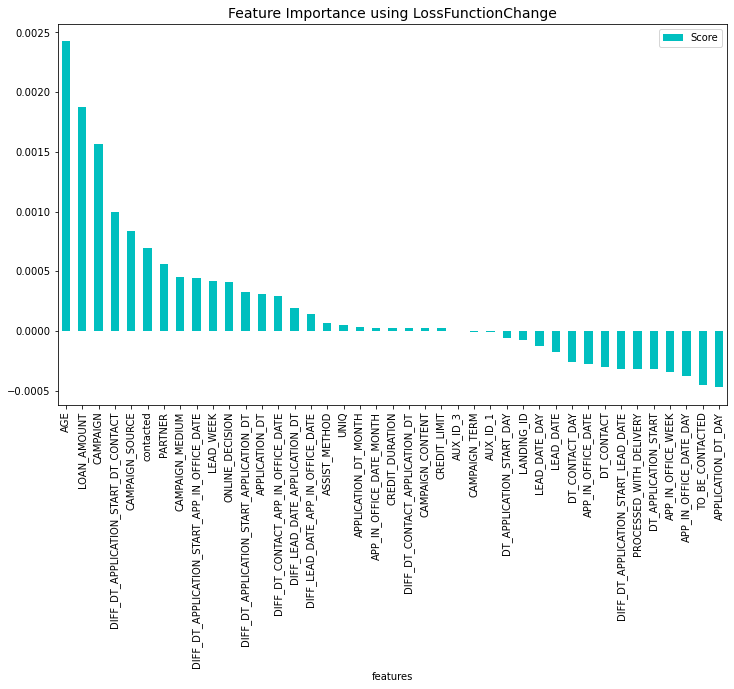

In [380]:
get_feature_imp_plot(MODEL, 
                     X_train, y_train, 
                     X_test, y_test, 
                     ind, 
                     method="LossFunctionChange", 
                     metric=log_loss)

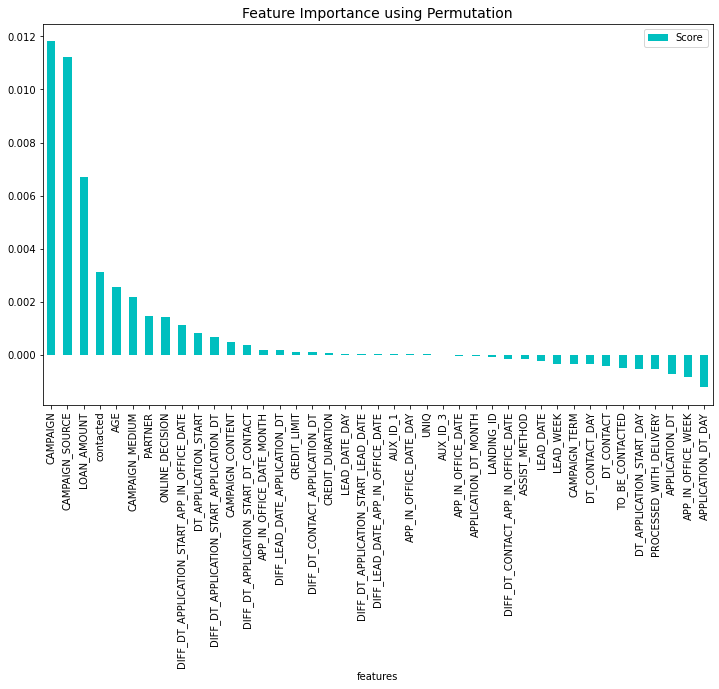

In [381]:
get_feature_imp_plot(MODEL, 
                     X_train, y_train, 
                     X_test, y_test, 
                     ind, 
                     method="Permutation", 
                     metric=log_loss)